In [2]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings

warnings.filterwarnings('ignore')


Načtení datasetu vehicles.csv

In [3]:
df = pd.read_csv("vehicles.csv")
df


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


výpis sloupců

In [4]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

Smazání nepotřebných sloupců

In [5]:
df = df.drop(["id", "url", "region_url", "transmission", "VIN", "image_url",],axis=1)

Kontrola datových typů sloupců 

In [6]:
df.dtypes

region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
drive            object
size             object
type             object
paint_color      object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

Analýza NaN hodnot 

In [7]:
nan_counts = df.isna().sum()
nan_counts_sorted = nan_counts.loc[nan_counts > 0].sort_values(ascending=False).to_frame(name="counts")
nan_counts_sorted["percentage"] = (nan_counts_sorted.counts*100)/df.shape[0]
nan_counts_sorted

,counts,percentage
county,426880,100.000000
size,306361,71.767476
cylinders,177678,41.622470
condition,174104,40.785232
drive,130567,30.586347
paint_color,130203,30.501078
type,92858,21.752717
manufacturer,17646,4.133714
title_status,8242,1.930753
lat,6549,1.534155


Smazání sloupce "county" a "size", jelikož se vnich nachází jen NaN hodnota nebo procento NaN hodnot je příliš vysoké

In [8]:
df = df.drop(["county", "size"], axis=1)

Rozdělení sloupců na stringové a numerické

In [9]:
string_columns = df.dtypes.loc[df.dtypes == np.object].index.to_list()
numerical_columns = df.dtypes.loc[~(df.dtypes == np.object)].index.to_list()

In [10]:
df.loc[:, numerical_columns]

,price,year,odometer,lat,long
0,6000,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN
...,...,...,...,...,...
426875,23590,2019.0,32226.0,33.786500,-84.445400
426876,30590,2020.0,12029.0,33.786500,-84.445400
426877,34990,2020.0,4174.0,33.779214,-84.411811
426878,28990,2018.0,30112.0,33.786500,-84.445400


In [11]:
df.loc[:, string_columns]

,region,manufacturer,model,condition,cylinders,fuel,title_status,drive,type,paint_color,description,state,posting_date
0,prescott,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN
1,fayetteville,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN
2,florida keys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN
3,worcester / central MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN
4,greensboro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,nissan,maxima s sedan 4d,good,6 cylinders,gas,clean,fwd,sedan,NaN,Carvana is the safer way to buy a car During t...,wy,2021-04-04T03:21:31-0600
426876,wyoming,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,clean,fwd,sedan,red,Carvana is the safer way to buy a car During t...,wy,2021-04-04T03:21:29-0600
426877,wyoming,cadillac,xt4 sport suv 4d,good,NaN,diesel,clean,NaN,hatchback,white,Carvana is the safer way to buy a car During t...,wy,2021-04-04T03:21:17-0600
426878,wyoming,lexus,es 350 sedan 4d,good,6 cylinders,gas,clean,fwd,sedan,silver,Carvana is the safer way to buy a car During t...,wy,2021-04-04T03:21:11-0600


Analýza bez cíle

In [12]:
df.loc[:, numerical_columns].describe()

,price,year,odometer,lat,long
count,4.268800e+05,425675.000000,4.224800e+05,420331.000000,420331.000000
mean,7.519903e+04,2011.235191,9.804333e+04,38.493940,-94.748599
std,1.218228e+07,9.452120,2.138815e+05,5.841533,18.365462
min,0.000000e+00,1900.000000,0.000000e+00,-84.122245,-159.827728
25%,5.900000e+03,2008.000000,3.770400e+04,34.601900,-111.939847
50%,1.395000e+04,2013.000000,8.554800e+04,39.150100,-88.432600
75%,2.648575e+04,2017.000000,1.335425e+05,42.398900,-80.832039
max,3.736929e+09,2022.000000,1.000000e+07,82.390818,173.885502


In [13]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  drive         296313 non-null  object 
 11  type          334022 non-null  object 
 12  paint_color   296677 non-null  object 
 13  description   426810 non-null  object 
 14  state         426880 non-null  object 
 15  lat           420331 non-null  float64
 16  long          420331 non-null  float64
 17  posting_date  426812 non-null  object 
dtypes: f

Analýza "target column" klíčového sloupce "price" počet hodnot

In [14]:
print(df.price.value_counts())
print("Průměr", round(df.price.mean(), 2))
print("Median", round(df.price.median(), 2))


0        32895
6995      3169
7995      3129
9995      2867
8995      2837
         ...  
21298        1
49217        1
63195        1
19709        1
17873        1
Name: price, Length: 15655, dtype: int64
Průměr 75199.03
Median 13950.0


Představa o target column "price" pomocí seaborn histplot

<AxesSubplot: title={'center': 'Price overview'}, xlabel='price', ylabel='Count'>

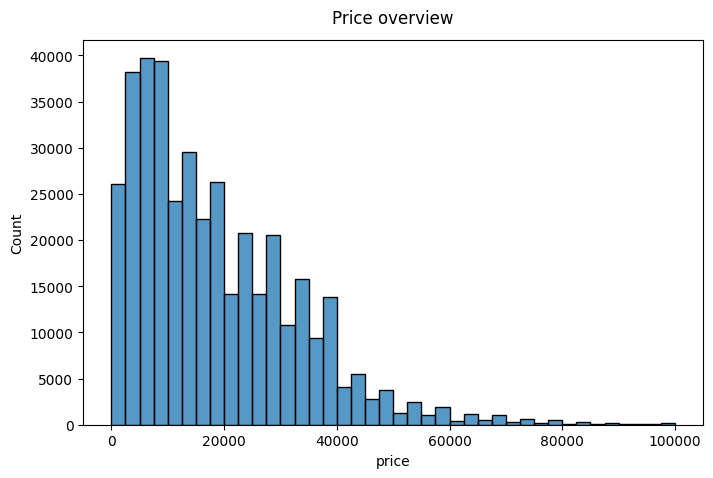

In [15]:
df_price =df[(df.price >=1)&(df.price <= 100000)]
f, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Price overview', pad=12)
sns.histplot(df_price, x="price", stat='count', bins=40 )

Porovnání sloupce "price" a "odometer" v seaborn

Text(-3.6805555555555554, 0.5, 'Price')

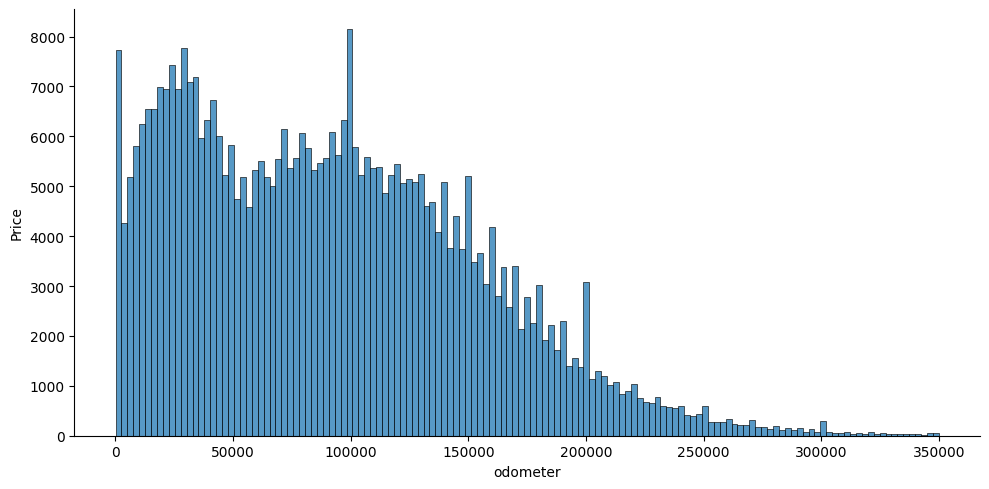

In [16]:
df_price = df[(df.price >=0) & (df.price <=900_00)]
df_odo = df_price[(df_price.odometer >=100) & (df_price.odometer <=350_000)]
sns.displot(data=df_odo, x="odometer", aspect=2, height=5)
plt.ylabel("Price", fontsize=10)


Porovnání sloupce "price" "year" v seaborn

Text(-12.430555555555555, 0.5, 'Price')

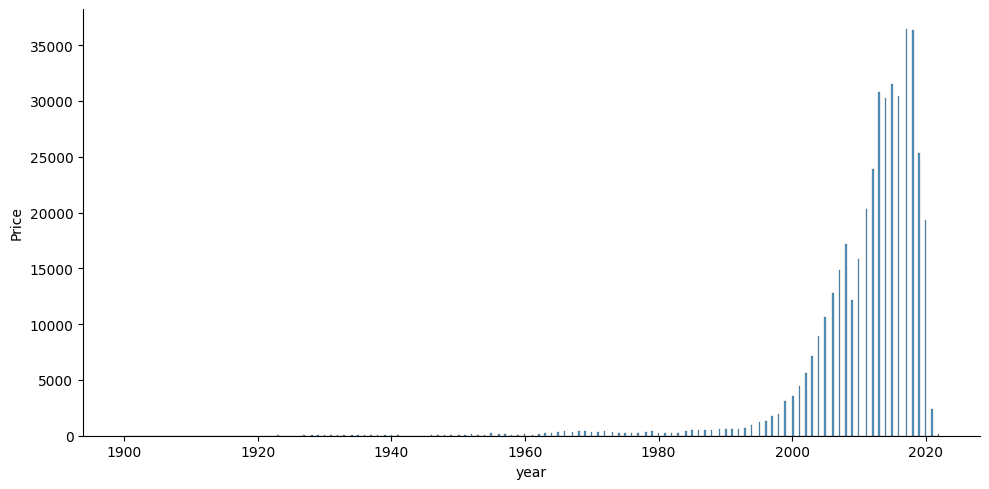

In [17]:
sns.displot(data=df, x="year", aspect=2, height=5)
plt.ylabel("Price", fontsize=10)

In [18]:
df_price_0 =  df[(df.price >= 0) & (df.price <=90_000)]
df_price_odo =  df_price_0[(df.odometer >=0) & (df.odometer <=350_000)]
print(df_price_odo.describe())

               price           year       odometer            lat  \
count  419449.000000  418341.000000  419449.000000  412981.000000   
mean    17313.359822    2011.283988   90853.449704      38.513401   
std     14649.623380       9.336643   62237.575425       5.832703   
min         0.000000    1900.000000       0.000000     -81.838232   
25%      5990.000000    2008.000000   37688.000000      34.620000   
50%     13990.000000    2013.000000   85090.000000      39.179138   
75%     26450.000000    2017.000000  132794.000000      42.417300   
max     90000.000000    2022.000000  350000.000000      82.390818   

                long  
count  412981.000000  
mean      -94.673109  
std        18.360361  
min      -159.827728  
25%      -111.925970  
50%       -88.310560  
75%       -80.830000  
max       167.629911  


Analýza vlivu numerických sloupců na "price" pomocí korelace

In [19]:
df.loc[:, numerical_columns].corr()["price"].sort_values()

year       -0.004925
long       -0.000408
lat         0.000357
odometer    0.010032
price       1.000000
Name: price, dtype: float64

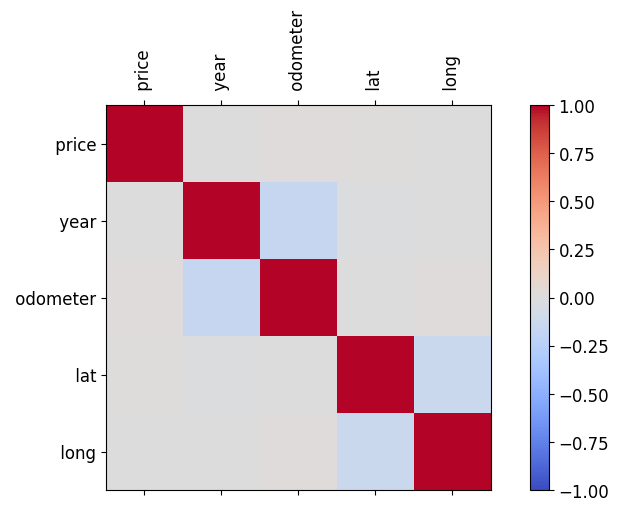

In [20]:
plt.rcParams['figure.figsize'] = 10, 5
dic = {"size": 12}
matplotlib.rc('font', **dic)

# Now we plot correlation of attributes
x = df.loc[:,numerical_columns]
alpha = x.corr().columns
plt.rcParams["axes.grid"] = False

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(x.corr(method='pearson'), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
fig.colorbar(cax)

plt.xticks(rotation='vertical')
ax.set_xticks(np.arange(len(alpha)))
ax.set_yticks(np.arange(len(alpha)))
ax.set_xticklabels([' ']+alpha)
ax.set_yticklabels([' ']+alpha)
ax.tick_params(labelsize = 12)

Podíl vozidel s různým typem paliva 'seaborn'

<AxesSubplot: xlabel='fuel', ylabel='count'>

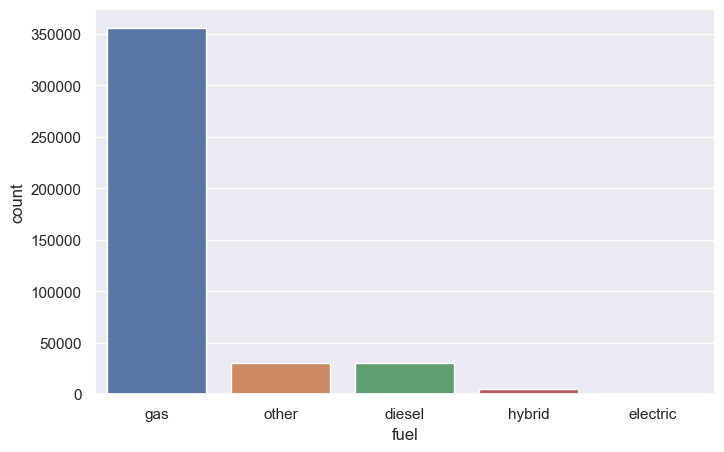

In [21]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x='fuel', data=df)

Podíl vozidel v DF dle výrobce 'seaborn'

<AxesSubplot: xlabel='count', ylabel='manufacturer'>

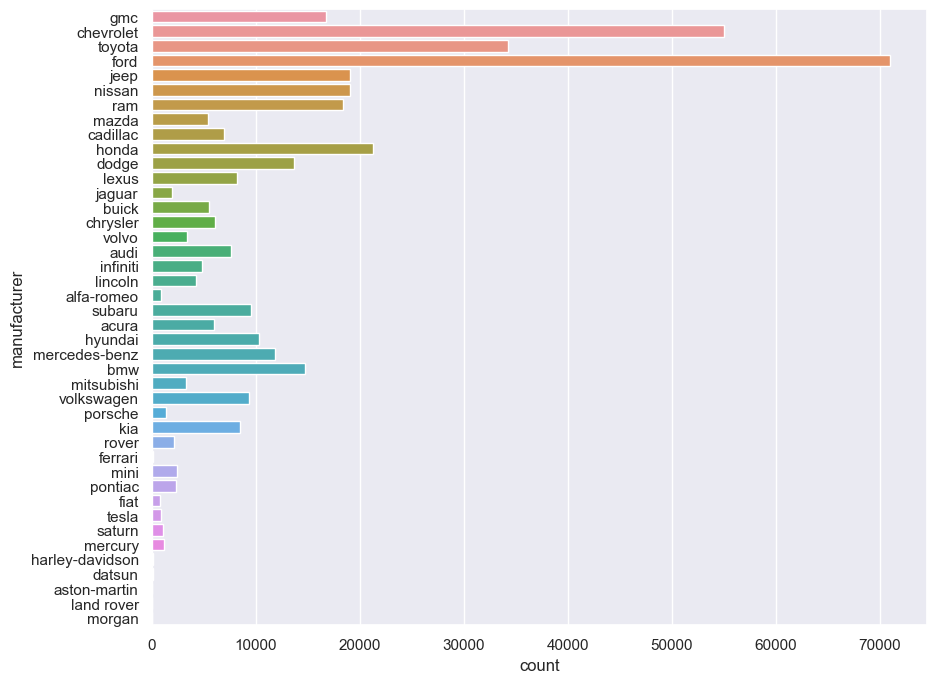

In [22]:
sns.set(rc={"figure.figsize":(10,8)})
sns.countplot( y="manufacturer", data=df, )

Analýza cen vozidel "seaborn"

<AxesSubplot: xlabel='price', ylabel='manufacturer'>

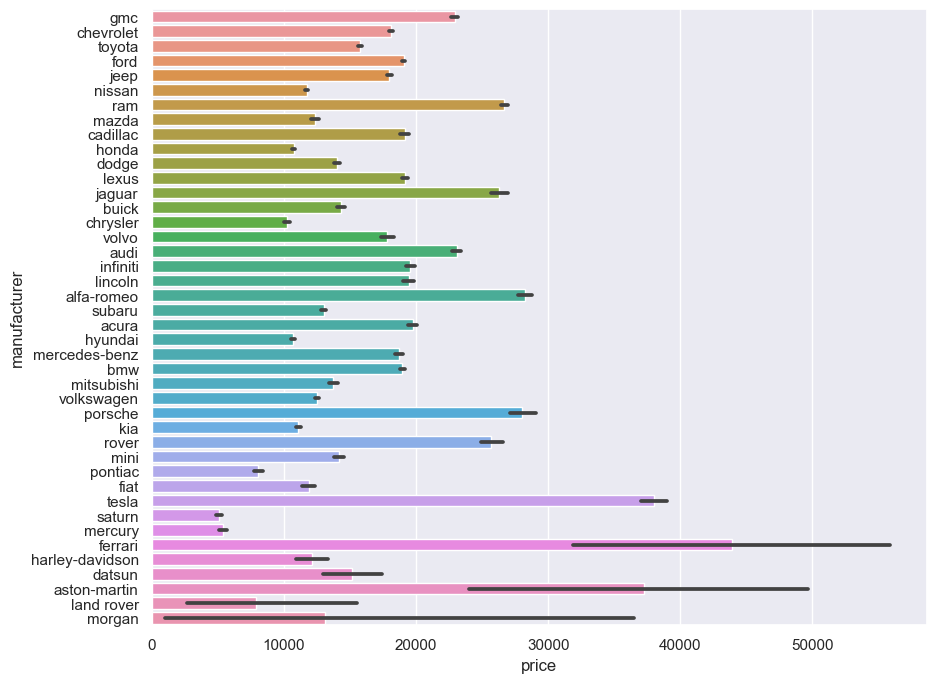

In [23]:
sns.set(rc={"figure.figsize":(10,8)})
sns.barplot(data=df_price_0, x="price", y="manufacturer")

Podíl barvy vozidel v DF vehicles.csv "seaborn"

<AxesSubplot: xlabel='count', ylabel='paint_color'>

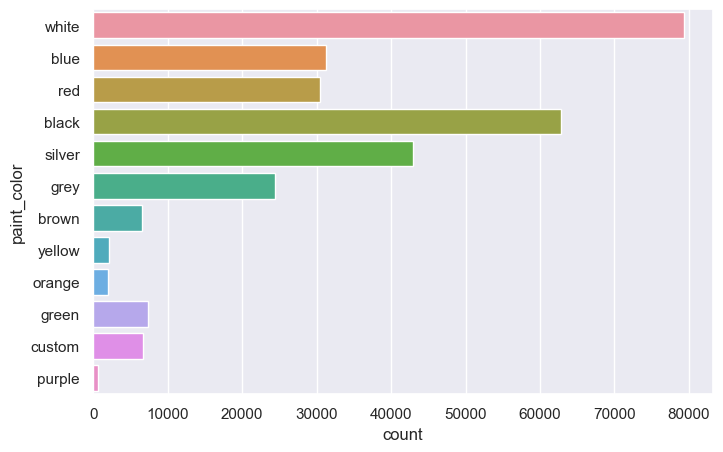

In [24]:
sns.set(rc={"figure.figsize":(8,5)})
sns.countplot( y="paint_color", data=df, )

Prodej vozidel dle států USA

<AxesSubplot: xlabel='count', ylabel='state'>

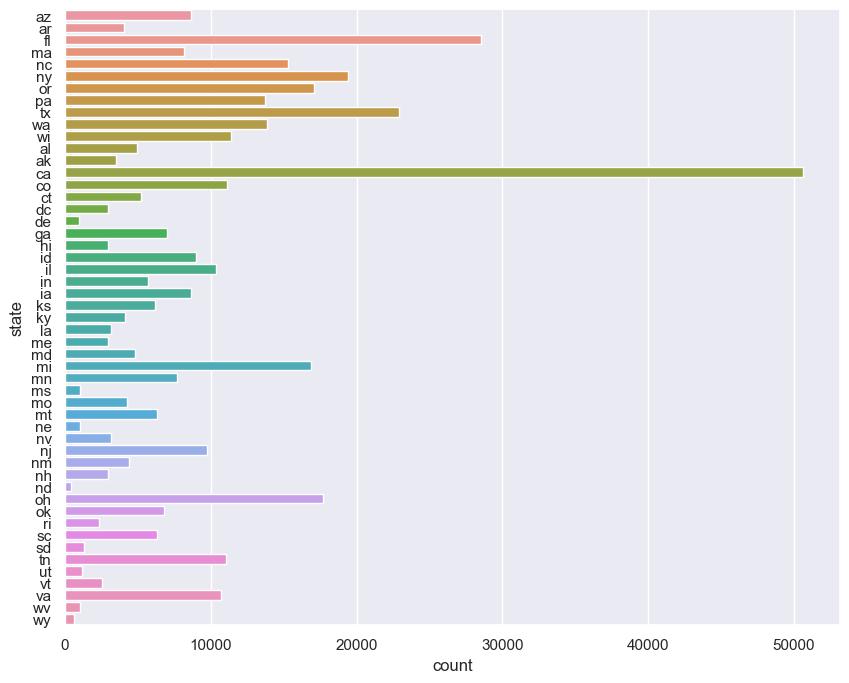

In [26]:
sns.set(rc={"figure.figsize":(10,8)})
sns.countplot( y="state", data=df, )